In [ ]:
#Now do the following:
#Extract the date and base speed for a benchmark of your choice
#Plot the data in a semi-log plot
#Now train a linear model to fit your plot.
#How well is Moore’s law holding up?

In [24]:
##Moore's Law
import csv
import pandas as pd
import numpy as np

data = pd.read_csv("/Users/qiusuwang/Desktop/specdata20120207/benchmarks.txt")
print(data.head(5))        

                 testID    benchName   base  peak
0  cpu95-19990104-03254  101.tomcatv  19.40  27.1
1  cpu95-19990104-03254     102.swim  27.20  34.8
2  cpu95-19990104-03254   103.su2cor  10.10  9.98
3  cpu95-19990104-03254  104.hydro2d   8.58  8.61
4  cpu95-19990104-03254    107.mgrid   8.94  9.44


/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [32]:
data_1 = data.filter(items=['testID', 'base'])

In [78]:
def getDate(testID):
    arr = testID.split('-')
    if len(arr) >= 2:
        if len(arr[1]) == 6:
            return int('19' + arr[1])
        else:
            return int(arr[1])
    return np.nan

benchMark = '102.swim'
benchMark_data = data_1[data['benchName'] == benchMark]
baseData = benchMark_data[['testID','base']]
baseData['date'] = baseData['testID'].apply(getDate)
baseData = baseData.dropna()

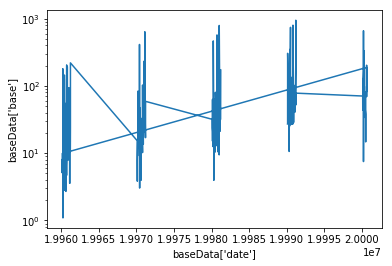

In [79]:
import matplotlib.pyplot as plt
plt.semilogy(baseData['date'], baseData['base'])
plt.xlabel("baseData['date']")
plt.ylabel("baseData['base']")
plt.show()

In [80]:
from sklearn import linear_model
import numpy as np

x_train = np.array(baseData['date'][:-100]).reshape(len(baseData['date'])-100,-1)
y_train = baseData['base'][:-100]

x_test = np.array(baseData['date'][-100:]).reshape(100,-1)
y_test = baseData['base'][-100:]

lm = linear_model.LinearRegression()
model = lm.fit(x_test,y_test)

#lm.score(x_test,y_test)

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Coefficients: 
 [0.00282796]
Mean squared error: 15359.34
Variance score: -0.02


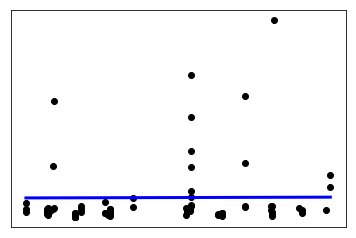

In [82]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(x_test, y_test, color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

(1797, 64)


<Figure size 432x288 with 0 Axes>

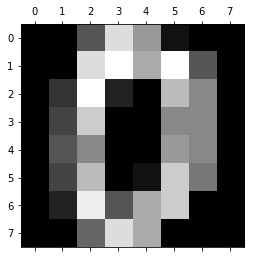

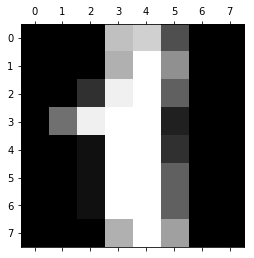

In [58]:
## MINIST digits
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 

digits = load_digits()
print(digits.data.shape)

plt.gray() 
plt.matshow(digits.images[0]) 
plt.matshow(digits.images[1]) 
plt.show() 

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train) 

predictions = knn.predict(x_test)
print (knn.score(x_test, y_test))

mse = (((predictions - y_test) ** 2).sum()) / len(predictions)
print (mse)


0.9866666666666667
0.20444444444444446
